This code is used to compute error curves as in Figure 1 of the paper.
Recovery in the Wishart model
---

Experiment with 3 different networks  with same hidden and output layer dimensions and different latent space dimension.

The results are the average of 50 Monte Carlo runs


In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import importlib

In [62]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [63]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

In [64]:
import sys
PATH = '/content/gdrive/My Drive/Colab Notebooks/NEURIPS20'
sys.path.append(PATH)

In [65]:
import generative as gnl
import utils
import spike_lib as spike

In [66]:
importlib.reload(spike);

## Parameters

In [67]:
# control parameter
p = np.linspace(1.5, 7.2, 8)
print(p)

# number of Monte Carlo runs
NMC = 75

hid_dim = 250 # hidden layer width
space_dim  = 1700 # ouptut dim
layers = [_, hid_dim, space_dim] 
th = np.log((layers[1]**2)*layers[2]) 

sigma = 1. # we fix sigma
w = 1

[1.5        2.31428571 3.12857143 3.94285714 4.75714286 5.57142857
 6.38571429 7.2       ]


In [68]:
#optimization params
Nsteps = 2500
LR  = 0.005
sigma0 = 0.0001 # we randomly initialize the iterates from x_0 \mathcal{N}(0, \sigma0^2 I)
params = [LR, Nsteps, sigma, sigma0]

In [69]:
PATH_res = PATH + '/RESULTS/WS'
print(PATH_res)

/content/gdrive/My Drive/Colab Notebooks/NEURIPS20/RESULTS/WS


# COMPUTATIONS

## k = 10

In [70]:
# architecture
latent_dim = 10
layers = [latent_dim, hid_dim, space_dim]

# target latent vector
xstar = Variable(torch.zeros(latent_dim)) # the target point is zstar = e_2 
xstar.data[1] = 1
xstar = xstar.cuda()

# logs
k10_logs_mean = np.zeros([len(p),6])
k10_logs_std = np.zeros([len(p),6])

# errors
NS10 = ((w**2)*latent_dim*th/(p**2)).astype(int)
print('Number of samples used \n', NS10)

Number of samples used 
 [82 34 18 11  8  5  4  3]


In [71]:
%%time
for ix, ns in enumerate(NS10):
    print(ix)
    [LOGS_mean, LOGS_std] = spike.MC_expr_PCA(NMC, xstar, layers, ns, params, normalize = True)
    k10_logs_mean[ix,:] = LOGS_mean
    k10_logs_std[ix,:] = LOGS_std
    np.save(PATH_res+'/k10_logs_mean.npy', k10_logs_mean)
    np.save(PATH_res+'/k10_logs_std.npy', k10_logs_std)

0
1
2
3
4
5
6
7
CPU times: user 39min 15s, sys: 1min 38s, total: 40min 54s
Wall time: 41min 11s


## k = 30

In [72]:
# architecture
latent_dim = 30
layers = [latent_dim, hid_dim, space_dim]

# target latent vector
xstar = Variable(torch.zeros(latent_dim)) # the target point is zstar = e_2 
xstar.data[1] = 1
xstar = xstar.cuda()

# logs
k30_logs_mean = np.zeros([len(p),6])
k30_logs_std = np.zeros([len(p),6])

# errors
NS30 = ((w**2)*latent_dim*th/(p**2)).astype(int)
print('Number of samples used \n', NS30)

Number of samples used 
 [246 103  56  35  24  17  13  10]


In [73]:
%%time
for ix, ns in enumerate(NS30):
    print(ix)
    [LOGS_mean, LOGS_std] = spike.MC_expr_PCA(NMC, xstar, layers, ns, params, normalize = True)
    k30_logs_mean[ix,:] = LOGS_mean
    k30_logs_std[ix,:] = LOGS_std
    np.save(PATH_res+'/k30_logs_mean.npy', k30_logs_mean)
    np.save(PATH_res+'/k30_logs_std.npy', k30_logs_std)

0
1
2
3
4
5
6
7
CPU times: user 39min 2s, sys: 1min 38s, total: 40min 41s
Wall time: 40min 59s


## k = 70

In [74]:
# architecture
latent_dim = 70
layers = [latent_dim, hid_dim, space_dim]

# target latent vector
xstar = Variable(torch.zeros(latent_dim)) # the target point is zstar = e_2 
xstar.data[1] = 1
xstar = xstar.cuda()

# logs
k70_logs_mean = np.zeros([len(p),6])
k70_logs_std = np.zeros([len(p),6])

# errors
NS70 = ((w**2)*latent_dim*th/(p**2)).astype(int)
print('Number of samples used \n', NS70)

Number of samples used 
 [574 241 132  83  57  41  31  24]


In [75]:
%%time
for ix, ns in enumerate(NS70):
    print(ix)
    [LOGS_mean, LOGS_std] = spike.MC_expr_PCA(NMC, xstar, layers, ns, params, normalize = True)
    k70_logs_mean[ix,:] = LOGS_mean
    k70_logs_std[ix,:] = LOGS_std
    np.save(PATH_res+'/k70_logs_mean.npy', k70_logs_mean)
    np.save(PATH_res+'/k70_logs_std.npy', k70_logs_std)

0
1
2
3
4
5
6
7
CPU times: user 39min 6s, sys: 1min 38s, total: 40min 45s
Wall time: 41min 4s


# Comparisons

In [76]:
k10_logs_mean = np.load(PATH_res+'/k10_logs_mean.npy')
k30_logs_mean = np.load(PATH_res+'/k30_logs_mean.npy')
k70_logs_mean = np.load(PATH_res+'/k70_logs_mean.npy')

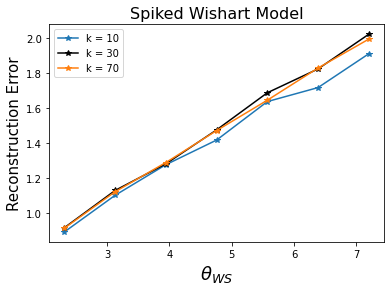

In [77]:
plt.plot((p)[1:], k10_logs_mean[1:,1], '-*',label = 'k = 10')
plt.plot((p)[1:], k30_logs_mean[1:,1], 'k-*',label = 'k = 30')
plt.plot((p)[1:], k70_logs_mean[1:,1], '-*',label = 'k = 70')
plt.legend(loc='upper left');
plt.legend(loc='upper left');
plt.xlabel(r"$\theta_{WS}$", fontsize=18);
plt.ylabel(r"Reconstruction Error", fontsize=15);
plt.title('Spiked Wishart Model', fontsize = 16);
plt.savefig(PATH_res+'/MSE_WS_new.pdf',bbox_inches = 'tight',format='pdf')